# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing the dataset

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = df['YearsExperience'].values
y = df['Salary'].values

In [5]:
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [8]:
X_train

array([ 8.7,  4.5,  3.2,  4.9,  3.2,  5.9,  3.7,  7.9,  5.3,  2.2,  9. ,
        3. ,  8.2, 10.3,  9.6,  4.1,  7.1,  6. ,  1.3,  5.1,  1.5,  4. ,
        2. ,  1.1])

In [24]:
X_test

array([ 4. , 10.5,  3.9,  6.8,  9.5,  2.9])

In [26]:
y_train

array([109431.,  61111.,  54445.,  67938.,  64445.,  81363.,  57189.,
       101302.,  83088.,  39891., 105582.,  60150., 113812., 122391.,
       112635.,  57081.,  98273.,  93940.,  46205.,  66029.,  37731.,
        56957.,  43525.,  39343.])

In [31]:
X_train.shape

(24,)

## Training the Simple Linear Regression model on the Training set

#### general equation for linear regression
y = w * X + b <br>
y: Dependent variable <br>
X: independent variable <br>
w: slope <br>
b: intercept <br>

In [9]:
class LinearRegression:
    def __init__(self, lr: float = 0.001, n_rate: int = 1000) -> None:
        self.lr = lr
        self.n_rate = n_rate
        self.w = None # weight
        self.b = None # biases

    def fit(self, X, y):
        # n: number of samples
        # m: number of features

        X = X.reshape(-1, 1)
        n = X.shape[1]
        print(X)
        m = 1

        self.w = np.random.rand(m) # initialize random weight
        self.b = 0

        for i in range(self.n_rate):

            # we start with random prediction since our weights are randomly initialized
            # y = w * X + b linear regression equation
            y_predict = np.dot(X, self.w) + self.b


            dw = (1 / n) * np.dot(X.T, y_predict - y)
            db = (1 / n) * np.sum(y_predict - y)

            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
        return self

    def predict(self, X):
        X = X.reshape(-1, 1)
        return np.dot(X, self.w) + self.b


regressor = LinearRegression()

regressor.fit(X_train, y_train)

[[ 8.7]
 [ 4.5]
 [ 3.2]
 [ 4.9]
 [ 3.2]
 [ 5.9]
 [ 3.7]
 [ 7.9]
 [ 5.3]
 [ 2.2]
 [ 9. ]
 [ 3. ]
 [ 8.2]
 [10.3]
 [ 9.6]
 [ 4.1]
 [ 7.1]
 [ 6. ]
 [ 1.3]
 [ 5.1]
 [ 1.5]
 [ 4. ]
 [ 2. ]
 [ 1.1]]


## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

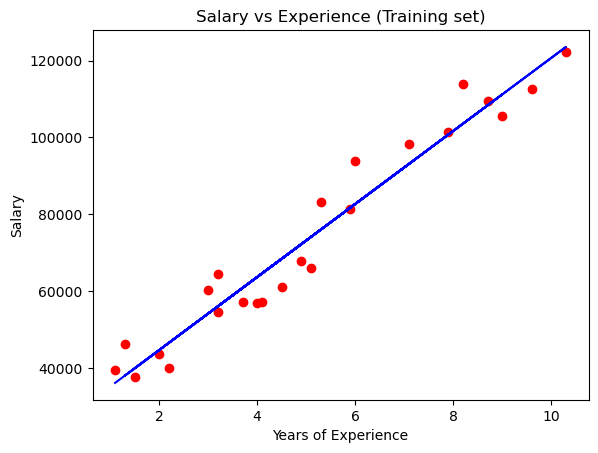

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

Text(0, 0.5, 'Salary')

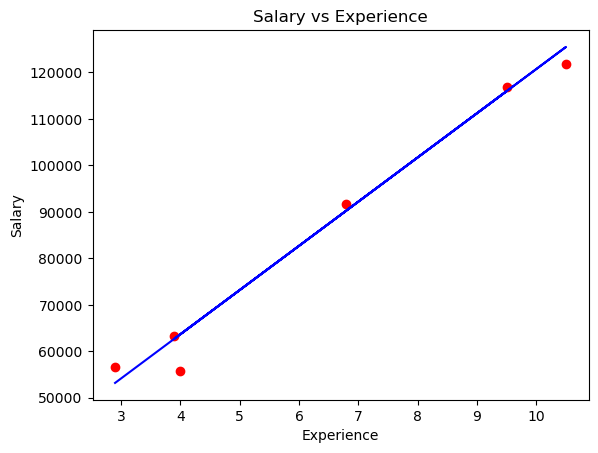

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title("Salary vs Experience")
plt.xlabel('Experience')
plt.ylabel('Salary')